In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split  # 对数据集切分
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# 机器算法模型
# from sklearn.neighbors import KNeighborsRegressor  # KNN，即K近邻算法
from sklearn.linear_model import LinearRegression  # 多元线性回归算法
# from sklearn.linear_model import Ridge  # 线性回归算法Ridge回归，岭回归
# from sklearn.linear_model import Lasso  # 线性回归算法Lasso回归，可用作特征筛选
# from sklearn.tree import DecisionTreeRegressor  # 决策树，既可以做分类也可以做回归（本文主要用于分类问题）
# from sklearn.svm import SVR  # 支持向量机

In [3]:
# 生成训练数据和测试数据
boston = datasets.load_boston()
train = boston.data  # 样本
target = boston.target  # 标签

# 切割数据样本集合测试集
X_train, x_test, y_train, y_true = train_test_split(train, target, test_size=0.2)  # 20%测试集；80%训练集

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

<AxesSubplot:>

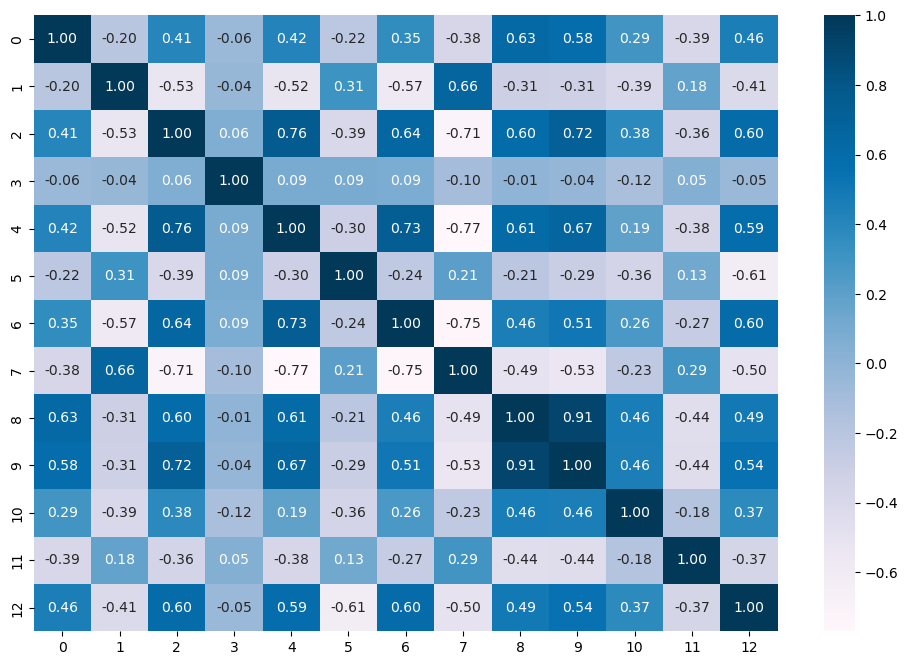

In [4]:
plt.figure(figsize=(12,8))
data=pd.DataFrame(boston.data)
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='PuBu')


In [5]:
# 可视化
data_df = pd.DataFrame(boston.data, columns=boston.feature_names)
data_df['房价值'] = boston.target
data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,房价值
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# 创建学习模型
linear = LinearRegression()
# knn = KNeighborsRegressor()
# ridge = Ridge()
# lasso = Lasso()
# decision = DecisionTreeRegressor()
# svr = SVR()

In [7]:
# 训练模型
linear.fit(X_train, y_train)
# knn.fit(X_train, y_train)  # 学习率、惩罚项都封装好了
# ridge.fit(X_train, y_train)
# lasso.fit(X_train, y_train)
# decision.fit(X_train, y_train)
# svr.fit(X_train, y_train)

LinearRegression()

In [8]:
# 预测数据
y_pre_linear = linear.predict(x_test)
# y_pre_knn = knn.predict(x_test)
# y_pre_ridge = ridge.predict(x_test)
# y_pre_lasso = lasso.predict(x_test)
# y_pre_decision = decision.predict(x_test)
# y_pre_svr = svr.predict(x_test)
 
print(linear.coef_)  # w值
print(linear.intercept_)  # b值

[-1.18878291e-01  4.54315564e-02  5.46687799e-02  2.76556721e+00
 -1.76198354e+01  4.89739562e+00 -9.97595319e-03 -1.53074156e+00
  2.82574857e-01 -1.20210343e-02 -9.98624897e-01  7.69240164e-03
 -4.61694520e-01]
30.86566973892021


In [9]:
# 评分，R2 决定系数（拟合优度）。模型越好：r2→1；模型越差：r2→0
linear_score = r2_score(y_true, y_pre_linear)
# knn_score = r2_score(y_true, y_pre_knn)
# ridge_score = r2_score(y_true, y_pre_ridge)
# lasso_score = r2_score(y_true, y_pre_lasso)
# decision_score = r2_score(y_true, y_pre_decision)
# svr_score = r2_score(y_true, y_pre_svr)

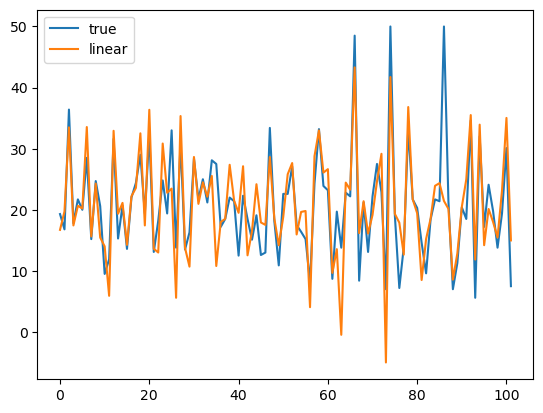

In [10]:
# 绘图
# Linear
plt.plot(y_true, label='true')
plt.plot(y_pre_linear, label='linear')
plt.legend()

# # KNN
# plt.plot(y_true, label='true')
# plt.plot(y_pre_knn, label='knn')
# plt.legend()
 
# # Ridge
# plt.plot(y_true, label='true')
# plt.plot(y_pre_ridge, label='ridge')
# plt.legend()
 
# # Lasso
# plt.plot(y_true, label='true')
# plt.plot(y_pre_lasso, label='lasso')
# plt.legend()
 
# # Decision
# plt.plot(y_true, label='true')
# plt.plot(y_pre_decision, label='decision')
# plt.legend()
 
# # SVR
# plt.plot(y_true, label='true')
# plt.plot(y_pre_svr, label='svr')
# plt.legend()
 
plt.show()